#**Ride price model**
- the project divide to three parts

1. Data Preparation
2. Model Building and Training
3. Evaluation & Visualization (Code)

#**1. Data Preparation**
- in data preparation we're gonna clean the data and create the new clean data

- for this we're gonna use

1.   Handling the missing values
2.   Data detect and treat outlires
3. encode catgorical features
4. Feature Scaling

**Handling the missing values**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
uncleaned_data = pd.read_csv("/content/ride_price_estimation_dataset.csv")
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ride_ID                 2000 non-null   object 
 1   Trip_Distance_km        2000 non-null   float64
 2   Est_Duration_min        2000 non-null   float64
 3   Time_of_Day             2000 non-null   object 
 4   Traffic_Level           2000 non-null   object 
 5   Weather_Condition       2000 non-null   object 
 6   Demand_Level            2000 non-null   object 
 7   Vehicle_Type            2000 non-null   object 
 8   Pickup_Location_Type    2000 non-null   object 
 9   Dropoff_Location_Type   2000 non-null   object 
 10  Is_Holiday              2000 non-null   bool   
 11  Passenger_Count         2000 non-null   int64  
 12  Booking_Lead_Time_min   2000 non-null   int64  
 13  Route_Complexity_Score  2000 non-null   int64  
 14  Nearby_Major_Event      2000 non-null   

In [ ]:
uncleaned_data.columns

Index(['Ride_ID', 'Trip_Distance_km', 'Est_Duration_min', 'Time_of_Day',
       'Traffic_Level', 'Weather_Condition', 'Demand_Level', 'Vehicle_Type',
       'Pickup_Location_Type', 'Dropoff_Location_Type', 'Is_Holiday',
       'Passenger_Count', 'Booking_Lead_Time_min', 'Route_Complexity_Score',
       'Nearby_Major_Event', 'Toll_Fees', 'Surge_Multiplier',
       'Fuel_Price_Index', 'Final_Ride_Price'],
      dtype='object')

drop duplicate

In [ ]:
# drop duplicate
uncleaned_data.duplicated().sum()

np.int64(0)

In [ ]:
uncleaned_data.drop_duplicates(inplace=True)

handle the nan values

In [ ]:
# handle the nan values
uncleaned_data.isna()
uncleaned_data.isna().sum() # if all values is 0 it there is no nan values

,0
Ride_ID,0
Trip_Distance_km,0
Est_Duration_min,0
Time_of_Day,0
Traffic_Level,0
Weather_Condition,0
Demand_Level,0
Vehicle_Type,0
Pickup_Location_Type,0
Dropoff_Location_Type,0


In [ ]:
uncleaned_data = uncleaned_data.dropna()

**Data detect and treat outlires**

In [ ]:
# Data detecte and treat outliers
col = "Final_Ride_Price"

In [ ]:
# Calculate IQR
Q1 = uncleaned_data[col].quantile(0.25)
Q3 = uncleaned_data[col].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# define the bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -28.05624999999999
Upper Bound: 133.71375


In [ ]:
# Detect Outliers
outliers = uncleaned_data[(uncleaned_data[col] < lower_bound) | (uncleaned_data[col] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 84


In [ ]:
""" Treatment: Capping(This replaces values above the upper bound with the upper bound
 and values below the lower bound with the lower bound.)"""


' Treatment: Capping(This replaces values above the upper bound with the upper bound\n and values below the lower bound with the lower bound.)'

In [ ]:
data_clean = uncleaned_data.copy()
data_clean[col] = data_clean[col].clip(lower=lower_bound, upper=upper_bound)
uncleaned_data = data_clean

In [ ]:
outliers = uncleaned_data[(uncleaned_data[col] < lower_bound) | (uncleaned_data[col] > upper_bound)]

**Encode catgorical features**

In [ ]:
# Convert 'HH:MM' string to a numerical Hour (0-23)
uncleaned_data['Hour'] = pd.to_datetime(uncleaned_data['Time_of_Day']).dt.hour

/tmp/ipython-input-4180074804.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  uncleaned_data['Hour'] = pd.to_datetime(uncleaned_data['Time_of_Day']).dt.hour


In [ ]:
# Ordinal Encoding (For Ranked Categories)
# High Traffic is 'more' than Low Traffic, so we use 0, 1, 2
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
demand_map = {'Low': 0, 'Normal': 1, 'High': 2}

uncleaned_data['Traffic_Level'] = uncleaned_data['Traffic_Level'].map(traffic_map)
uncleaned_data['Demand_Level'] = uncleaned_data['Demand_Level'].map(demand_map)

In [ ]:
# One-Hot Encoding (For Nominal Categories)
# Weather and Vehicle Types don't have a numerical rank, so we create binary columns
nominal_cols = ['Weather_Condition', 'Vehicle_Type', 'Pickup_Location_Type', 'Dropoff_Location_Type']
uncleaned_data = pd.get_dummies(uncleaned_data, columns=nominal_cols, drop_first=True)

In [ ]:
# Binary Encoding (Booleans to 1/0)
uncleaned_data['Is_Holiday'] = uncleaned_data['Is_Holiday'].astype(int)
uncleaned_data['Nearby_Major_Event'] = uncleaned_data['Nearby_Major_Event'].astype(int)

In [ ]:
# We drop 'Ride_ID' (text ID) and 'Time_of_Day' (replaced by Hour)
cols_to_drop = ['Ride_ID', 'Time_of_Day']
uncleaned_data = uncleaned_data.drop(columns=[c for c in cols_to_drop if c in uncleaned_data.columns])

In [ ]:
# finally let see what have done encoded
uncleaned_data.head(3)
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Trip_Distance_km                     2000 non-null   float64
 1   Est_Duration_min                     2000 non-null   float64
 2   Traffic_Level                        2000 non-null   int64  
 3   Demand_Level                         2000 non-null   int64  
 4   Is_Holiday                           2000 non-null   int64  
 5   Passenger_Count                      2000 non-null   int64  
 6   Booking_Lead_Time_min                2000 non-null   int64  
 7   Route_Complexity_Score               2000 non-null   int64  
 8   Nearby_Major_Event                   2000 non-null   int64  
 9   Toll_Fees                            2000 non-null   float64
 10  Surge_Multiplier                     2000 non-null   float64
 11  Fuel_Price_Index              

**Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Defining our features (X) and our target (y)
X = uncleaned_data.drop(columns=['Final_Ride_Price'])
y = uncleaned_data['Final_Ride_Price']

In [ ]:
# We define a "High Cost" ride as anything above the median price
median_price = y.median()
y_class = (y > median_price).astype(int)

In [ ]:
# Splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# This normalizes the data so that 'Distance' and 'Fuel Index' are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preparation Complete.")
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Data Preparation Complete.
Training set size: 1600 rows
Testing set size: 400 rows


In [ ]:
uncleaned_data.to_csv('cleaned_ride_dataset_price.csv', index=False)

# **2. Model Building and Training**
- This stage involves applying the machine learning workflows to solve the prediction and classification tasks.

1.   Regression Model (Price Prediction)
2.   Classification Model (Cost Classification)



**Regression Model (Price Prediction)**

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
# 1. Train Linear Regression (Price Prediction) ---
# Initialize the model
reg_model = LinearRegression()

In [ ]:
# Train on the scaled training data
reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred_reg = reg_model.predict(X_test_scaled)

**Classification Model (Cost Classification)**

In [ ]:
# Create the binary target: 1 if Price > Median, 0 otherwise
median_price = y.median()
y_train_class = (y_train > median_price).astype(int)
y_test_class = (y_test > median_price).astype(int)

In [ ]:
# Initialize the model
clf_model = LogisticRegression()

In [ ]:
# Train on the scaled training data
clf_model.fit(X_train_scaled, y_train_class)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred_class = clf_model.predict(X_test_scaled)

In [ ]:
print("Models Trained Successfully.")

Models Trained Successfully.


# **3. Evaluation & Visualization (Code)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Evaluation 1: Linear Regression Performance ---
r2 = r2_score(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)

print(f"--- Linear Regression Results ---")
print(f"R² Score: {r2:.4f} (Model explains {r2*100:.2f}% of price variance)")
print(f"Mean Absolute Error: ${mae:.2f}\n")

--- Linear Regression Results ---
R² Score: 0.9488 (Model explains 94.88% of price variance)
Mean Absolute Error: $4.77



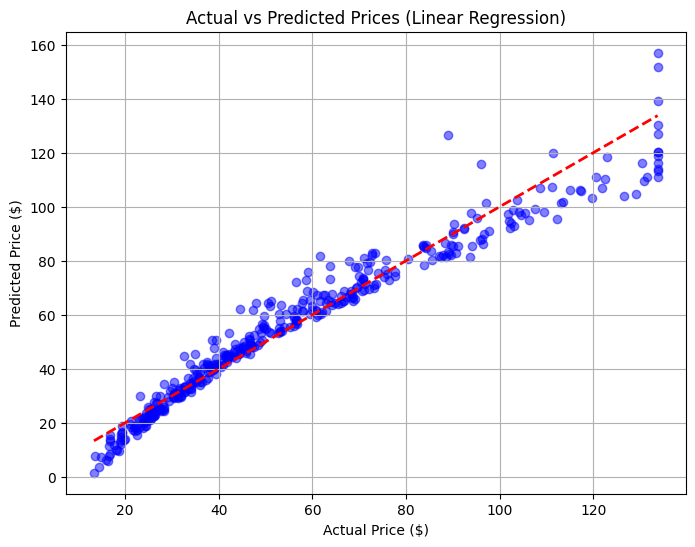

In [ ]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.grid(True)
plt.show()

In [ ]:

# Evaluation 2: Logistic Regression Performance ---
acc = accuracy_score(y_test_class, y_pred_class)
cm = confusion_matrix(y_test_class, y_pred_class)

In [ ]:

print(f"--- Logistic Regression Results ---")
print(f"Accuracy: {acc*100:.2f}%")
print(f"Confusion Matrix:\n{cm}")

--- Logistic Regression Results ---
Accuracy: 97.25%
Confusion Matrix:
[[194   7]
 [  4 195]]


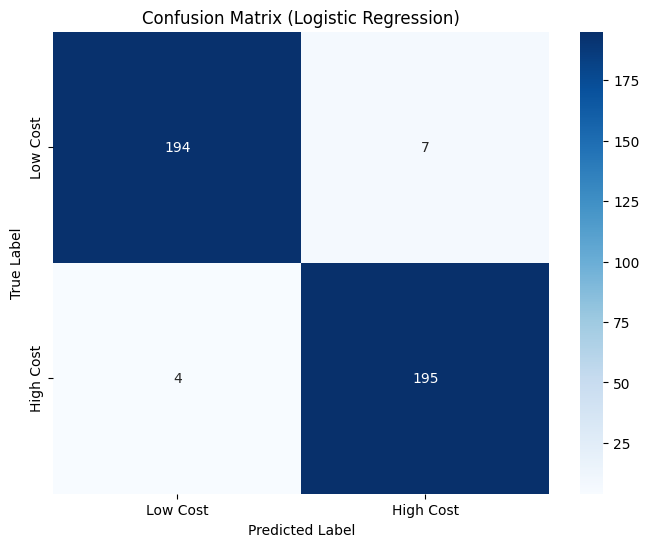

In [ ]:

# Plot: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Cost', 'High Cost'],
            yticklabels=['Low Cost', 'High Cost'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Project Summary

Your project focused on building a ride price prediction and classification model. It was divided into three main phases:

### 1. Data Preparation:
- The raw dataset was loaded and inspected.
- Duplicate rows were checked and removed.
- Missing values were identified and handled by dropping rows with `NaN`s.
- Outliers in the `Final_Ride_Price` column were detected using the IQR method and treated by capping them to the upper and lower bounds.
- Categorical features were encoded:
    - `Time_of_Day` was converted into an `Hour` feature.
    - `Traffic_Level` and `Demand_Level` were ordinally encoded.
    - `Weather_Condition`, `Vehicle_Type`, `Pickup_Location_Type`, and `Dropoff_Location_Type` were one-hot encoded.
    - Boolean features like `Is_Holiday` and `Nearby_Major_Event` were binary encoded.
- Irrelevant columns (`Ride_ID`, `Time_of_Day`) were dropped.
- Features were scaled using `StandardScaler`.
- The data was split into training (80%) and testing (20%) sets.
- The cleaned data was saved to `cleaned_ride_dataset_price.csv`.

### 2. Model Building and Training:
- **Regression Model (Price Prediction):** A `LinearRegression` model was initialized and trained to predict the `Final_Ride_Price`.
- **Classification Model (Cost Classification):** A binary target `y_class` was created (1 for prices above median, 0 otherwise), and a `LogisticRegression` model was initialized and trained to classify rides as 'High Cost' or 'Low Cost'.

### 3. Evaluation & Visualization:
- **Linear Regression:**
    - The model's performance was evaluated using R² score (approximately 94.88%) and Mean Absolute Error (approximately $4.77).
    - A scatter plot visualizing Actual vs. Predicted Prices was generated.
- **Logistic Regression:**
    - The model's performance was evaluated using accuracy (approximately 97.25%) and a confusion matrix.
    - A heatmap of the confusion matrix was displayed to show the classification results.